In [78]:
#import libraries


import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy
from pathlib import Path
import plotly.express as px

#loads state code dictionary to simplify heatmap creation 
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [79]:
school_df = pd.read_csv(
    Path("../uncc_project1/revised_school_data.csv"))
school_df.head()

,State,Rank in Spending,Spending per pupil,Total Funding,Funding State Sources,Funding Local Sources,Total Expenditures,Current Spending,Rank,State.1,College Readiness,High School Graduation Rate,NAEP Math Scores,NAEP Reading Scores,Preschool Enrollment
0,Alabama,45,803907000,4148764000,2652925000,7854516000,6998941000,5.871790e+11,45,Alabama,44,5,49,48,38
1,Alaska,7,307320000,1613675000,573685000,2623014000,2327151000,6.998941e+09,49,Alaska,37,49,43,49,33
2,Arizona,48,1160908000,3440726000,3828455000,7984562000,7276067000,2.327151e+09,47,Arizona,47,47,27,37,42
3,Arkansas,43,593656000,4122377000,668082000,5407470000,4750938000,7.276067e+09,38,Arkansas,45,9,43,37,19
4,California,27,7709079000,50904567000,27943521000,82146317000,72641244000,4.750938e+09,40,California,33,36,38,37,16


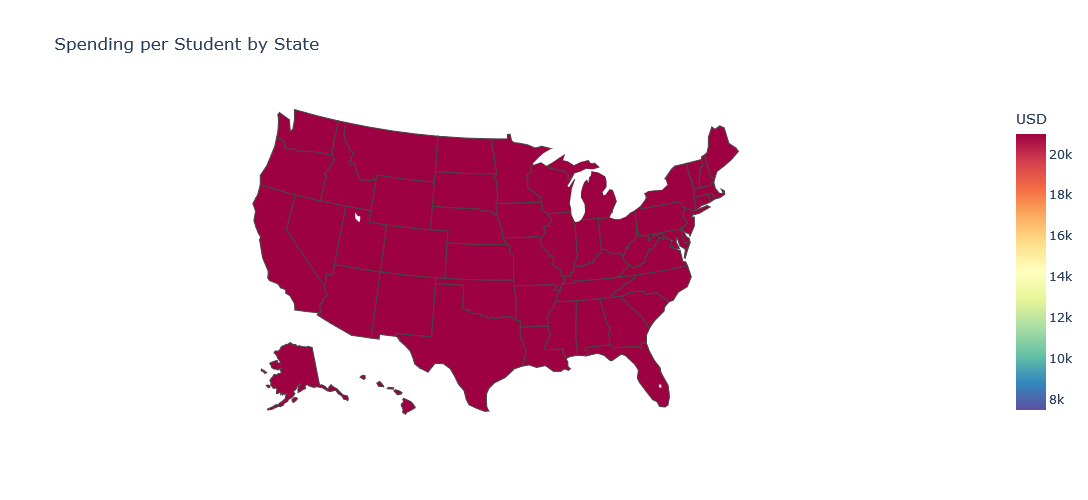

In [80]:
school_df['Code'] = school_df['State'].map(code)
fig = px.choropleth(school_df,
                    locations='Code',
                    color= school_df['Spending per pupil'].astype(float),
                    color_continuous_scale='spectral_r',
                    range_color=[7500,21000],
                    hover_name='State',
                    locationmode='USA-states',
                    title="Spending per Student by State",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="USD"))
fig= fig.update_layout(margin_l=5)
fig=fig.update_layout(margin_r=10)
fig

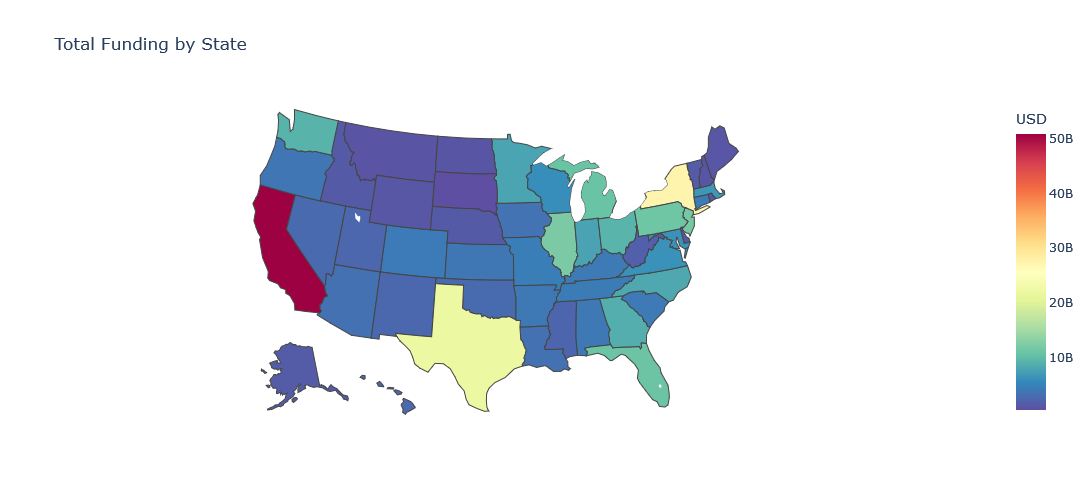

In [81]:
school_df['Code'] = school_df['State'].map(code)
fig = px.choropleth(school_df,
                    locations='Code',
                    color= school_df['Total Funding'].astype(float),
                    color_continuous_scale='spectral_r',
                    
                    hover_name='State',
                    locationmode='USA-states',
                    title="Total Funding by State",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="USD"))
fig= fig.update_layout(margin_l=5)
fig=fig.update_layout(margin_r=10)
fig